# BELLABEAT CASE STUDY IN R 

Bellabeat is a successful small company, but they have the potential to become a larger player in the global smart device market. Urška Sršen, cofounder and Chief Creative Officer of Bellabeat, believes that analyzing smart
device fitness data could help unlock new growth opportunities for the company.

We have been asked to focus on one of Bellabeat’s products and analyze smart device data to gain insight into how consumers are using their smart devices. The insights discovered will then help guide marketing strategy for the company. 


## About the company 

Urška Sršen and Sando Mur founded Bellabeat, a high-tech company that manufactures health-focused smart products. Sršen used her background as an artist to develop beautifully designed technology that informs and inspires women around the world. Since it was founded in 2013, Bellabeat has grown rapidly and quickly positioned itself as a tech-driven wellness company for women.

Sršen knows that an analysis of Bellabeat’s available consumer data would reveal more opportunities for growth. She has asked the marketing analytics team to focus on a Bellabeat product and analyze smart device usage data in order to gain insight into how people are already using their smart devices. Then, using this information, she would like high-level recommendations for how these trends can inform Bellabeat marketing strategy

### Questions for Analysis? 

1. **What are some trends in smart device usage?**
2. **How could these trends apply to Bellabeat customers?**
3. **How could these trends help influence Bellabeat marketing strategy**

## Dataset

Input dataset used for this analysis is public in nature, named [Fitbit Fitness Tracker Data](http://www.kaggle.com/datasets/arashnic/fitbit). This Kaggle data set contains personal fitness tracker from thirty fitbit users. Thirty eligible Fitbit users consented to the submission of personal tracker data, including minute-level output for physical activity, heart rate, and sleep monitoring. It includes information about daily activity, steps, and heart rate that can be used to explore users’ habits.

The dataset contains 18 csv files with all the tracked data. 


Installing core packages before starting the analysis. 

In [1]:
library(tidyverse) # metapackage of all tidyverse packages

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.4.0      ✔ purrr   1.0.1 
✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ tidyr   1.2.1      ✔ stringr 1.5.0 
✔ readr   2.1.3      ✔ forcats 0.5.2 
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


In [2]:
library(readr)    #for reading csv files 
library(ggplot2)  #for visualizations 
library(dplyr)    #for data manipulation 
library(tidyr)    #for data cleaning
library(lubridate)#for dealing with dates

Loading required package: timechange


Attaching package: ‘lubridate’


The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union




### Uploading the csv files.

Out of 18 csv files, provided in the dataset, I will be using only 4 of them, which are : 
1. dailyActivity_merged : Provides a comprehensive data about the users.
2. dailyCalories_merged : Reads the total calorie burnt by individual on a specific date. 
3. dailyIntensities_merged : Reads the total intensity workout by individual on a specific date. 
4. dailySteps_merged : Reads the total steps by individual on a specific date. 
5. weightLogInfo_merged :  Provides information about weight and height of individuals 
6. sleeDay_merged :  Provides information about sleeping patterns of individuals 


In [3]:
daily_activity <- as_tibble(read_csv("/kaggle/input/fitbit/Fitabase Data 4.12.16-5.12.16/dailyActivity_merged.csv"))
daily_calories <- as_tibble(read_csv("/kaggle/input/fitbit/Fitabase Data 4.12.16-5.12.16/dailyCalories_merged.csv"))
daily_intensity <- as_tibble(read_csv("/kaggle/input/fitbit/Fitabase Data 4.12.16-5.12.16/dailyIntensities_merged.csv"))
daily_steps <- as_tibble(read_csv("/kaggle/input/fitbit/Fitabase Data 4.12.16-5.12.16/dailySteps_merged.csv"))
weight_info <- as_tibble(read_csv("/kaggle/input/fitbit/Fitabase Data 4.12.16-5.12.16/weightLogInfo_merged.csv"))
sleep_info <- as_tibble(read_csv("/kaggle/input/fitbit/Fitabase Data 4.12.16-5.12.16/sleepDay_merged.csv"))

Rows: 940 Columns: 15
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (1): ActivityDate
dbl (14): Id, TotalSteps, TotalDistance, TrackerDistance, LoggedActivitiesDi...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 940 Columns: 3
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): ActivityDay
dbl (2): Id, Calories

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 940 Columns: 10
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): ActivityDay
dbl (9): Id, SedentaryMinutes, LightlyActiveMinutes, FairlyActiveMinutes, Ve...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the col

### Cleaning the data 

After uploading the required csv files, let us take a look at the data to determine the next step in out analysis. We will be using glimpse()/str()/head() in R for the same. 

In [4]:
str(sleep_info)

tibble [413 × 5] (S3: tbl_df/tbl/data.frame)
 $ Id                : num [1:413] 1.5e+09 1.5e+09 1.5e+09 1.5e+09 1.5e+09 ...
 $ SleepDay          : chr [1:413] "4/12/2016 12:00:00 AM" "4/13/2016 12:00:00 AM" "4/15/2016 12:00:00 AM" "4/16/2016 12:00:00 AM" ...
 $ TotalSleepRecords : num [1:413] 1 2 1 2 1 1 1 1 1 1 ...
 $ TotalMinutesAsleep: num [1:413] 327 384 412 340 700 304 360 325 361 430 ...
 $ TotalTimeInBed    : num [1:413] 346 407 442 367 712 320 377 364 384 449 ...


In [5]:
str(weight_info)

tibble [67 × 8] (S3: tbl_df/tbl/data.frame)
 $ Id            : num [1:67] 1.50e+09 1.50e+09 1.93e+09 2.87e+09 2.87e+09 ...
 $ Date          : chr [1:67] "5/2/2016 11:59:59 PM" "5/3/2016 11:59:59 PM" "4/13/2016 1:08:52 AM" "4/21/2016 11:59:59 PM" ...
 $ WeightKg      : num [1:67] 52.6 52.6 133.5 56.7 57.3 ...
 $ WeightPounds  : num [1:67] 116 116 294 125 126 ...
 $ Fat           : num [1:67] 22 NA NA NA NA 25 NA NA NA NA ...
 $ BMI           : num [1:67] 22.6 22.6 47.5 21.5 21.7 ...
 $ IsManualReport: logi [1:67] TRUE TRUE FALSE TRUE TRUE TRUE ...
 $ LogId         : num [1:67] 1.46e+12 1.46e+12 1.46e+12 1.46e+12 1.46e+12 ...


Parsing Date column to date datatype containing only dates not time.

In [6]:
weight_info <- mutate(weight_info, Date = as.Date(Date, format= "%m/%d/%Y"))
weight_info <- rename(weight_info, ActivityDay = Date)
str(weight_info)

tibble [67 × 8] (S3: tbl_df/tbl/data.frame)
 $ Id            : num [1:67] 1.50e+09 1.50e+09 1.93e+09 2.87e+09 2.87e+09 ...
 $ ActivityDay   : Date[1:67], format: "2016-05-02" "2016-05-03" ...
 $ WeightKg      : num [1:67] 52.6 52.6 133.5 56.7 57.3 ...
 $ WeightPounds  : num [1:67] 116 116 294 125 126 ...
 $ Fat           : num [1:67] 22 NA NA NA NA 25 NA NA NA NA ...
 $ BMI           : num [1:67] 22.6 22.6 47.5 21.5 21.7 ...
 $ IsManualReport: logi [1:67] TRUE TRUE FALSE TRUE TRUE TRUE ...
 $ LogId         : num [1:67] 1.46e+12 1.46e+12 1.46e+12 1.46e+12 1.46e+12 ...


In [7]:
sleep_info <- mutate(sleep_info, SleepDay = as.Date(SleepDay, format= "%m/%d/%Y"))
sleep_info <- rename(sleep_info, ActivityDay = SleepDay)
str(sleep_info)

tibble [413 × 5] (S3: tbl_df/tbl/data.frame)
 $ Id                : num [1:413] 1.5e+09 1.5e+09 1.5e+09 1.5e+09 1.5e+09 ...
 $ ActivityDay       : Date[1:413], format: "2016-04-12" "2016-04-13" ...
 $ TotalSleepRecords : num [1:413] 1 2 1 2 1 1 1 1 1 1 ...
 $ TotalMinutesAsleep: num [1:413] 327 384 412 340 700 304 360 325 361 430 ...
 $ TotalTimeInBed    : num [1:413] 346 407 442 367 712 320 377 364 384 449 ...


In [8]:
glimpse(daily_activity)

Rows: 940
Columns: 15
$ Id                       <dbl> 1503960366, 1503960366, 1503960366, 150396036…
$ ActivityDate             <chr> "4/12/2016", "4/13/2016", "4/14/2016", "4/15/…
$ TotalSteps               <dbl> 13162, 10735, 10460, 9762, 12669, 9705, 13019…
$ TotalDistance            <dbl> 8.50, 6.97, 6.74, 6.28, 8.16, 6.48, 8.59, 9.8…
$ TrackerDistance          <dbl> 8.50, 6.97, 6.74, 6.28, 8.16, 6.48, 8.59, 9.8…
$ LoggedActivitiesDistance <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, …
$ VeryActiveDistance       <dbl> 1.88, 1.57, 2.44, 2.14, 2.71, 3.19, 3.25, 3.5…
$ ModeratelyActiveDistance <dbl> 0.55, 0.69, 0.40, 1.26, 0.41, 0.78, 0.64, 1.3…
$ LightActiveDistance      <dbl> 6.06, 4.71, 3.91, 2.83, 5.04, 2.51, 4.71, 5.0…
$ SedentaryActiveDistance  <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, …
$ VeryActiveMinutes        <dbl> 25, 21, 30, 29, 36, 38, 42, 50, 28, 19, 66, 4…
$ FairlyActiveMinutes      <dbl> 13, 19, 11, 34, 10, 20, 16, 31, 12, 8, 27, 21…
$ LightlyActiveMin

In [9]:
str(daily_activity)

tibble [940 × 15] (S3: tbl_df/tbl/data.frame)
 $ Id                      : num [1:940] 1.5e+09 1.5e+09 1.5e+09 1.5e+09 1.5e+09 ...
 $ ActivityDate            : chr [1:940] "4/12/2016" "4/13/2016" "4/14/2016" "4/15/2016" ...
 $ TotalSteps              : num [1:940] 13162 10735 10460 9762 12669 ...
 $ TotalDistance           : num [1:940] 8.5 6.97 6.74 6.28 8.16 ...
 $ TrackerDistance         : num [1:940] 8.5 6.97 6.74 6.28 8.16 ...
 $ LoggedActivitiesDistance: num [1:940] 0 0 0 0 0 0 0 0 0 0 ...
 $ VeryActiveDistance      : num [1:940] 1.88 1.57 2.44 2.14 2.71 ...
 $ ModeratelyActiveDistance: num [1:940] 0.55 0.69 0.4 1.26 0.41 ...
 $ LightActiveDistance     : num [1:940] 6.06 4.71 3.91 2.83 5.04 ...
 $ SedentaryActiveDistance : num [1:940] 0 0 0 0 0 0 0 0 0 0 ...
 $ VeryActiveMinutes       : num [1:940] 25 21 30 29 36 38 42 50 28 19 ...
 $ FairlyActiveMinutes     : num [1:940] 13 19 11 34 10 20 16 31 12 8 ...
 $ LightlyActiveMinutes    : num [1:940] 328 217 181 209 221 164 233 264 205

As seen in the structure of data, ActivityDate column is of character datatype. Converting the same into date type. 

In [10]:
daily_activity$ActivityDate <- parse_date_time(daily_activity$ActivityDate, orders = c('mdy', 'dmy'))

In [11]:
str(daily_calories)
str(daily_intensity)
str(daily_steps)

tibble [940 × 3] (S3: tbl_df/tbl/data.frame)
 $ Id         : num [1:940] 1.5e+09 1.5e+09 1.5e+09 1.5e+09 1.5e+09 ...
 $ ActivityDay: chr [1:940] "4/12/2016" "4/13/2016" "4/14/2016" "4/15/2016" ...
 $ Calories   : num [1:940] 1985 1797 1776 1745 1863 ...
tibble [940 × 10] (S3: tbl_df/tbl/data.frame)
 $ Id                      : num [1:940] 1.5e+09 1.5e+09 1.5e+09 1.5e+09 1.5e+09 ...
 $ ActivityDay             : chr [1:940] "4/12/2016" "4/13/2016" "4/14/2016" "4/15/2016" ...
 $ SedentaryMinutes        : num [1:940] 728 776 1218 726 773 ...
 $ LightlyActiveMinutes    : num [1:940] 328 217 181 209 221 164 233 264 205 211 ...
 $ FairlyActiveMinutes     : num [1:940] 13 19 11 34 10 20 16 31 12 8 ...
 $ VeryActiveMinutes       : num [1:940] 25 21 30 29 36 38 42 50 28 19 ...
 $ SedentaryActiveDistance : num [1:940] 0 0 0 0 0 0 0 0 0 0 ...
 $ LightActiveDistance     : num [1:940] 6.06 4.71 3.91 2.83 5.04 ...
 $ ModeratelyActiveDistance: num [1:940] 0.55 0.69 0.4 1.26 0.41 ...
 $ VeryActiveDista

In [12]:
daily_calories$ActivityDay <- parse_date_time(daily_calories$ActivityDay, orders = c('mdy', 'dmy'))
daily_intensity$ActivityDay <- parse_date_time(daily_intensity$ActivityDay, orders = c('mdy', 'dmy'))
daily_steps$ActivityDay <- parse_date_time(daily_steps$ActivityDay, orders = c('mdy', 'dmy'))

As, the data type for Date column has been fixed, next step would be to combine these datasets into one. Keeping the argument all as FALSE, we are making sure that it is an inner join i.e. only the rows matched are present. 

In [13]:
merge1 <- merge(daily_calories, daily_intensity, all = FALSE)
merge2 <- merge(merge1, daily_steps, all = FALSE)
str(merge2)

'data.frame':	940 obs. of  12 variables:
 $ Id                      : num  1.5e+09 1.5e+09 1.5e+09 1.5e+09 1.5e+09 ...
 $ ActivityDay             : POSIXct, format: "2016-04-12" "2016-04-13" ...
 $ Calories                : num  1985 1797 1776 1745 1863 ...
 $ SedentaryMinutes        : num  728 776 1218 726 773 ...
 $ LightlyActiveMinutes    : num  328 217 181 209 221 164 233 264 205 211 ...
 $ FairlyActiveMinutes     : num  13 19 11 34 10 20 16 31 12 8 ...
 $ VeryActiveMinutes       : num  25 21 30 29 36 38 42 50 28 19 ...
 $ SedentaryActiveDistance : num  0 0 0 0 0 0 0 0 0 0 ...
 $ LightActiveDistance     : num  6.06 4.71 3.91 2.83 5.04 ...
 $ ModeratelyActiveDistance: num  0.55 0.69 0.4 1.26 0.41 ...
 $ VeryActiveDistance      : num  1.88 1.57 2.44 2.14 2.71 ...
 $ StepTotal               : num  13162 10735 10460 9762 12669 ...


Before combining daily_Activity, we can see that the column for dates has name ActivityDate while the merged dataframe has ActivityDay. Changing the name of column from ActivityDate to ActivityDay

In [14]:
daily_activity <- rename(daily_activity, ActivityDay = ActivityDate)
merge_3 <- merge(merge2, daily_activity, all = FALSE)
merge_4 <- merge(merge_3, sleep_info, all = FALSE)
final_merge <- merge(merge_4, weight_info, all = FALSE)
str(final_merge)

'data.frame':	35 obs. of  25 variables:
 $ Id                      : num  1.50e+09 1.50e+09 1.93e+09 4.56e+09 5.58e+09 ...
 $ ActivityDay             : POSIXct, format: "2016-05-02" "2016-05-03" ...
 $ Calories                : num  2004 1990 2151 1692 4552 ...
 $ SedentaryMinutes        : num  798 816 986 1121 525 ...
 $ LightlyActiveMinutes    : num  277 254 32 190 159 189 142 86 217 280 ...
 $ FairlyActiveMinutes     : num  15 24 0 0 37 14 24 0 0 3 ...
 $ VeryActiveMinutes       : num  41 50 0 0 200 50 8 0 0 50 ...
 $ SedentaryActiveDistance : num  0 0 0 0 0 0 0 0 0 0 ...
 $ LightActiveDistance     : num  5.92 4.88 0.25 2.27 2.32 ...
 $ ModeratelyActiveDistance: num  0.57 1.05 0 0 0.83 ...
 $ VeryActiveDistance      : num  3.21 3.73 0 0 5.98 ...
 $ StepTotal               : num  14727 15103 356 3428 12231 ...
 $ TotalSteps              : num  14727 15103 356 3428 12231 ...
 $ TotalDistance           : num  9.71 9.66 0.25 2.27 9.14 ...
 $ TrackerDistance         : num  9.71 9.66 0.25

### Analysis and Observations 

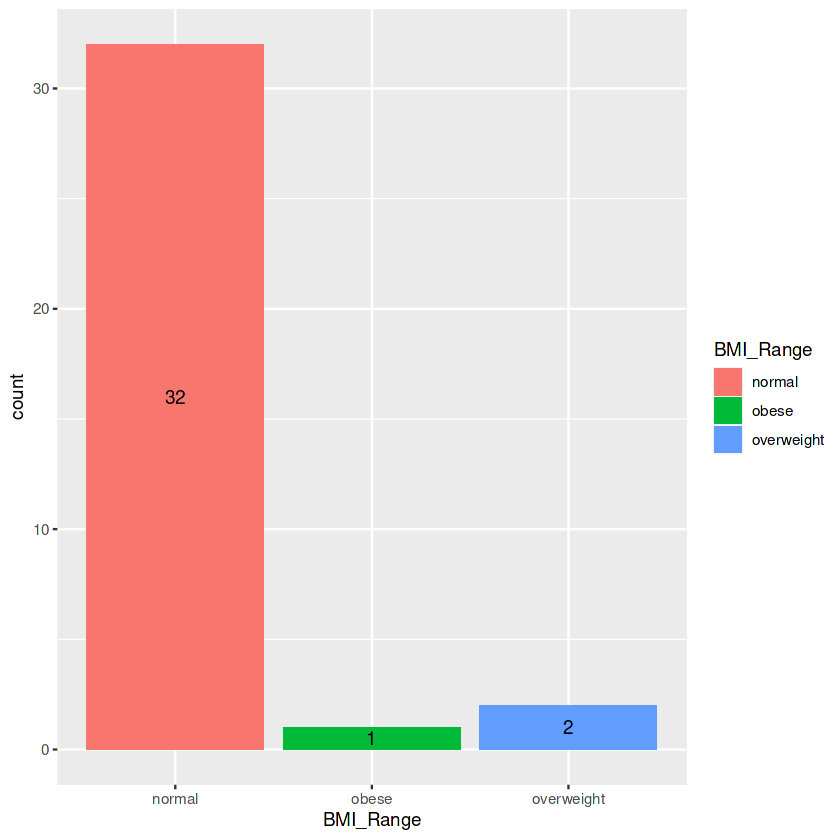

In [15]:
#plotting BMI for underweight, normal range, overweight and obese
final_merge <- final_merge %>% mutate(BMI_Range = case_when(BMI < 18.5 ~ 'underweight',
                                                           BMI >= 18.5 & BMI <25 ~ 'normal',
                                                           BMI >= 25 & BMI <30 ~ 'overweight',
                                                           BMI >30 ~ 'obese'))

fig1 = ggplot(data = final_merge) + geom_bar(mapping = aes(x = BMI_Range, fill = BMI_Range)) + 
geom_text(aes(x=BMI_Range, label = after_stat(count)), position = position_stack(vjust = 0.5), stat = "count")
fig1


As can be seen, there are no underweight person in the sample. There are 34 people in normal BMI range, 32 are overweight and 1 person is obese. 

Trying to map these BMI categories to the average steps walked and average calories burnt, seeing if there is any coorelation. 

In [16]:
underweight <- final_merge %>% filter(BMI < 18.5)
normal_weight <- final_merge %>% filter(BMI >= 18.5 & BMI <25)
over_weight <- final_merge %>% filter(BMI >= 25 & BMI <30)
obese <- final_merge %>% filter(BMI >= 30)

avg_steps_walked <- c(mean(normal_weight$TotalSteps), mean(over_weight$TotalSteps),mean(obese$TotalSteps))
#names(avg_steps_walked) <- c('normal_weight', 'over_weight', 'obese')

avg_calories_burnt <- c(mean(normal_weight$Calories), mean(over_weight$Calories),mean(obese$Calories))
#names(avg_calories_burnt) <- c('normal_weight', 'over_weight', 'obese')

avg_sleep_minutes <- c(mean(normal_weight$TotalMinutesAsleep), mean(over_weight$TotalMinutesAsleep),mean(obese$TotalMinutesAsleep))
#names(avg_sleep_minutes) <- c('normal_weight', 'over_weight', 'obese')

data <- data.frame(BMI = c('normal_weight', 'over_weight', 'obese'), avg_steps_walked = avg_steps_walked, avg_calories_burnt = avg_calories_burnt, avg_sleep_minutes = avg_sleep_minutes )
print(data)
#barplot(data, beside = T, col = data ) + legend("center",
#       legend = c("normal weight","overweight","obese"),
#       fill = data,       
#      border = "black", bty = "n", cex = 1.5)

            BMI avg_steps_walked avg_calories_burnt avg_sleep_minutes
1 normal_weight         10094.88           1982.031          437.4062
2   over_weight          7829.50           3122.000          332.0000
3         obese           356.00           2151.000          398.0000


In [17]:
fig2 <- ggplot(data, mapping = aes(x = BMI , y = avg_steps_walked, fill = BMI)) + geom_col()
fig3 <- ggplot(data, mapping = aes(x = BMI , y = avg_calories_burnt, fill = BMI)) + geom_col()
fig4 <- ggplot(data, mapping = aes(x = BMI , y = avg_sleep_minutes, fill = BMI)) + geom_col()



Attaching package: ‘gridExtra’


The following object is masked from ‘package:dplyr’:

    combine




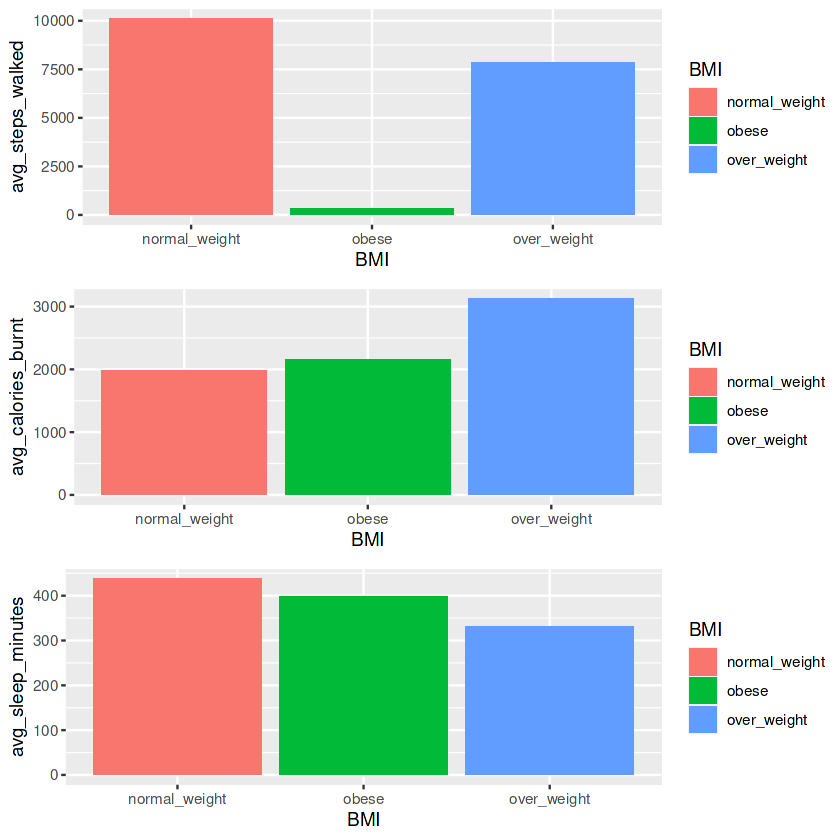

In [18]:
library(gridExtra)
grid.arrange(fig2, fig3, fig4)

Following observations can be made from the analysis done so far: 

**1. There are no underweight person in the population studied, which needs to be addressed to make analysis inclusive.**

**2. Although overweight persons have average steps walked less than normal wight range persons, the amount of calories they burnt are much larger than normal weight range persons.**

**3. The people who are in normal weight range have the best average sleep time i.e. 7 $\frac{1}{2}$ hours, which can be a good indicator of their ability to lead a content and peaceful life**


### Recommendations to the team 

**1. It is suggested to have reminders/alarms integrated in the devices to remind people of their daily target for calories burnt.**

**2. The advertising can also be focussed on establishing relation between on how factors such as good exercise regime, maintaining a good BMI are inherent to the sleep quality. Which in turn, affects the brain performance, emotional status and health of a person.**


